---

# Data Mining:<br>Statistical Modeling and Learning from Data

## Dr. Ciro Cattuto<br>Dr. Laetitia Gauvin<br>Dr. André Panisson

### Exercises - Neural Networks

---

Basic Operations example using TensorFlow library.

`conda install tensorflow keras`  
or  
`pip install tensorflow keras`  

In [1]:
%pylab inline

import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


We are also going to use pydot to show computation graphs.

`conda install pydot graphviz`

In [2]:
import pydot
from itertools import chain
def tf_graph_to_dot(in_graph):
    dot = pydot.Dot()
    dot.set('rankdir', 'LR')
    dot.set('concentrate', True)
    dot.set_node_defaults(shape='record')
    all_ops = in_graph.get_operations()
    all_tens_dict = {k: i for i,k in enumerate(set(chain(*[c_op.outputs for c_op in all_ops])))}
    for c_node in all_tens_dict.keys():
        node = pydot.Node(c_node.name)#, label=label)
        dot.add_node(node)
    for c_op in all_ops:
        for c_output in c_op.outputs:
            for c_input in c_op.inputs:
                dot.add_edge(pydot.Edge(c_input.name, c_output.name))
    return dot

from IPython.display import SVG
def show_graph(graph):
    tf_graph_to_dot(graph).write_svg('simple_tf.svg')
    return SVG('simple_tf.svg')

### Basic constant operations

The value returned by the constructor represents the output of the Constant op.

In [3]:
a = tf.constant(2, name='a')
b = tf.constant(3, name='b')

In [4]:
c = a+b

In [5]:
d = c**2

In [6]:
d

<tf.Tensor 'pow:0' shape=() dtype=int32>

The variable `d` is a `Tensor`, i.e. a result of a computation graph.

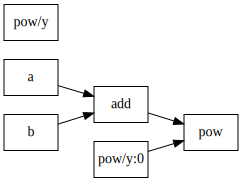

In [7]:
show_graph(tf.get_default_graph())

Launch the default graph.

In [8]:
with tf.Session() as sess:
    print "a: %i" % sess.run(a), "b: %i" % sess.run(b)
    print "Addition with constants: %i" % sess.run(a+b)
    print "Multiplication with constants: %i" % sess.run(a*b)

a: 2 b: 3
Addition with constants: 5
Multiplication with constants: 6


In [9]:
tf.reset_default_graph()

### Basic Operations with variable as graph input

The value returned by the constructor represents the output
of the Variable op. (define as input when running session)
tf Graph input

In [10]:
a = tf.placeholder(tf.int16, name='a')
b = tf.placeholder(tf.int16, name='b')

Define some operations

In [11]:
add = tf.add(a, b)
mul = tf.multiply(a, b)

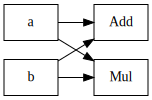

In [12]:
show_graph(tf.get_default_graph())

Launch the default graph.

In [13]:
with tf.Session() as sess:
    # Run every operation with variable input
    print "Addition with variables: %i" % sess.run(add, feed_dict={a: 2, b: 4})
    print "Multiplication with variables: %i" % sess.run(mul, feed_dict={a: 2, b: 3})

Addition with variables: 6
Multiplication with variables: 6


In [14]:
tf.reset_default_graph()

### Matrix Multiplication

Create a Constant op that produces a 1x2 matrix.  The op is
added as a node to the default graph.

The value returned by the constructor represents the output
of the Constant op.

In [15]:
matrix1 = tf.constant([[3., 3.]], name='input1')

In [16]:
matrix1

<tf.Tensor 'input1:0' shape=(1, 2) dtype=float32>

Create another Constant that produces a 2x1 matrix.

In [17]:
matrix2 = tf.constant([[2.],[2.]], name='input2')

In [18]:
matrix2

<tf.Tensor 'input2:0' shape=(2, 1) dtype=float32>

Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.   
The returned value, 'product', represents the result of the matrix
multiplication.

In [19]:
product = tf.matmul(matrix1, matrix2)

In [20]:
product

<tf.Tensor 'MatMul:0' shape=(1, 1) dtype=float32>

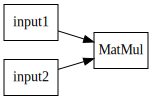

In [21]:
show_graph(tf.get_default_graph())

To run the matmul op we call the session 'run()' method, passing 'product'
which represents the output of the matmul op.  This indicates to the call
that we want to get the output of the matmul op back.

All inputs needed by the op are run automatically by the session.  They
typically are run in parallel.

The call 'run(product)' thus causes the execution of threes ops in the
graph: the two constants and matmul.

The output of the op is returned in 'result' as a numpy `ndarray` object.

In [22]:
with tf.Session() as sess:
    result = sess.run(product)
    print result

[[ 12.]]


In [23]:
tf.reset_default_graph()

## Logistic regression

This example is using the MNIST database of handwritten digits 
(http://yann.lecun.com/exdb/mnist/)

In [24]:
# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784], name='x') # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10], name='y') # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]), name='W')
b = tf.Variable(tf.zeros([10]), name='b')

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))

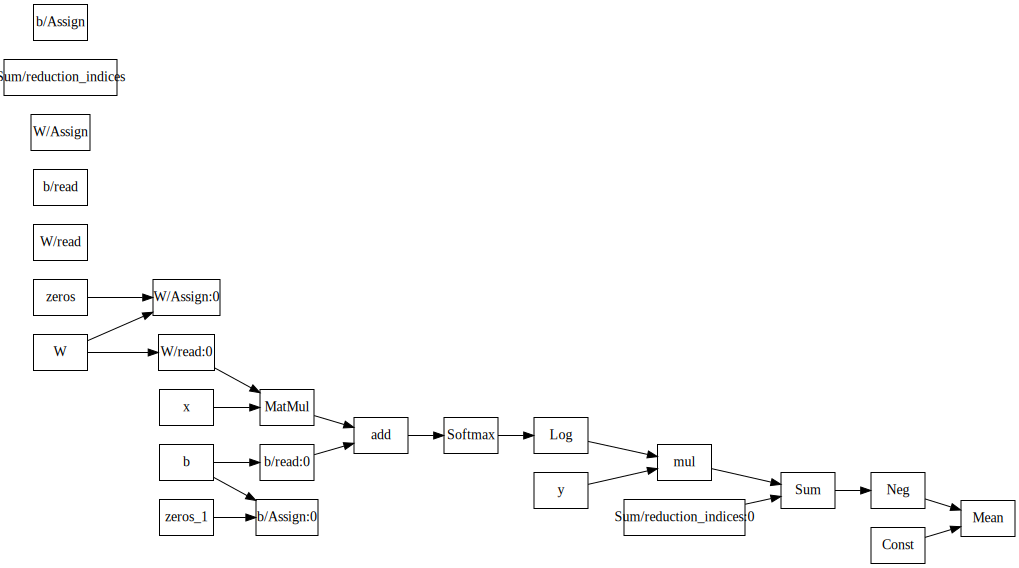

In [25]:
show_graph(tf.get_default_graph())

Calculate the gradients of `W` and `b` with respect to `cost`

In [26]:
W_grads, b_grads = tf.gradients(cost, [W, b])
W_grads, b_grads

(<tf.Tensor 'gradients/MatMul_grad/MatMul_1:0' shape=(784, 10) dtype=float32>,
 <tf.Tensor 'gradients/add_grad/Reshape_1:0' shape=(10,) dtype=float32>)

In [27]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [28]:
# Initializing the variables
init = tf.global_variables_initializer()

In [29]:
mnist.train.labels[:10]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]])

In [30]:
x_input = mnist.train.images[:10]
y_input = mnist.train.labels[:10]

print 'y_input:\n', y_input

with tf.Session() as sess:
    sess.run(init)
    v_pred = sess.run(pred, feed_dict={x: x_input, y: y_input})
    print 'v_pred:\n', v_pred
    v_cost = sess.run(cost, feed_dict={x: x_input, y: y_input})
    print 'v_cost:\n', v_cost
    v_W_grads = sess.run(W_grads, feed_dict={x: x_input, y: y_input})
    v_b_grads = sess.run(b_grads, feed_dict={x: x_input, y: y_input})

y_input:
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]
v_pred:
[[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]]
v_cost:
2.30259


In [31]:
# tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
print np.mean(-np.sum(y_input*np.log(v_pred), axis=1))

2.30258512497


In [32]:
print v_b_grads

[  1.30385160e-08  -1.00000001e-01   1.00000001e-01   9.31322575e-09
   1.67638063e-08   1.00000001e-01   1.30385160e-08   9.31322575e-09
  -9.99999866e-02   1.02445483e-08]


Create a Gradient Descent Optimizer

In [33]:
learning_rate = 0.01

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [34]:
# Parameters
training_epochs = 25
batch_size = 100
display_step = 1

total_batch = int(mnist.train.num_examples/batch_size)
print total_batch

550


Launch the graph

In [35]:
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost)

    print "Optimization Finished!"

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy for 3000 examples
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print "Accuracy:", accuracy.eval({x: mnist.test.images[:3000], y: mnist.test.labels[:3000]})

Epoch: 0001 cost= 1.183154716
Epoch: 0002 cost= 0.665118501
Epoch: 0003 cost= 0.552713217
Epoch: 0004 cost= 0.498661404
Epoch: 0005 cost= 0.465491770
Epoch: 0006 cost= 0.442607325
Epoch: 0007 cost= 0.425527330
Epoch: 0008 cost= 0.412178677
Epoch: 0009 cost= 0.401393159
Epoch: 0010 cost= 0.392407267
Epoch: 0011 cost= 0.384750850
Epoch: 0012 cost= 0.378167388
Epoch: 0013 cost= 0.372413613
Epoch: 0014 cost= 0.367275904
Epoch: 0015 cost= 0.362740646
Epoch: 0016 cost= 0.358594548
Epoch: 0017 cost= 0.354908445
Epoch: 0018 cost= 0.351491049
Epoch: 0019 cost= 0.348323269
Epoch: 0020 cost= 0.345414642
Epoch: 0021 cost= 0.342751602
Epoch: 0022 cost= 0.340224722
Epoch: 0023 cost= 0.337912710
Epoch: 0024 cost= 0.335758742
Epoch: 0025 cost= 0.333729535
Optimization Finished!
Accuracy: 0.888667


In [48]:
tf.reset_default_graph()

## Convolutional Network

In [49]:
# Parameters
learning_rate = 0.001
training_iters = 200000
batch_size = 128
display_step = 10

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.75 # Dropout, probability to keep units

# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)

In [50]:
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases, dropout):
    # Reshape input picture
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [51]:
# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = conv_net(x, weights, biases, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()

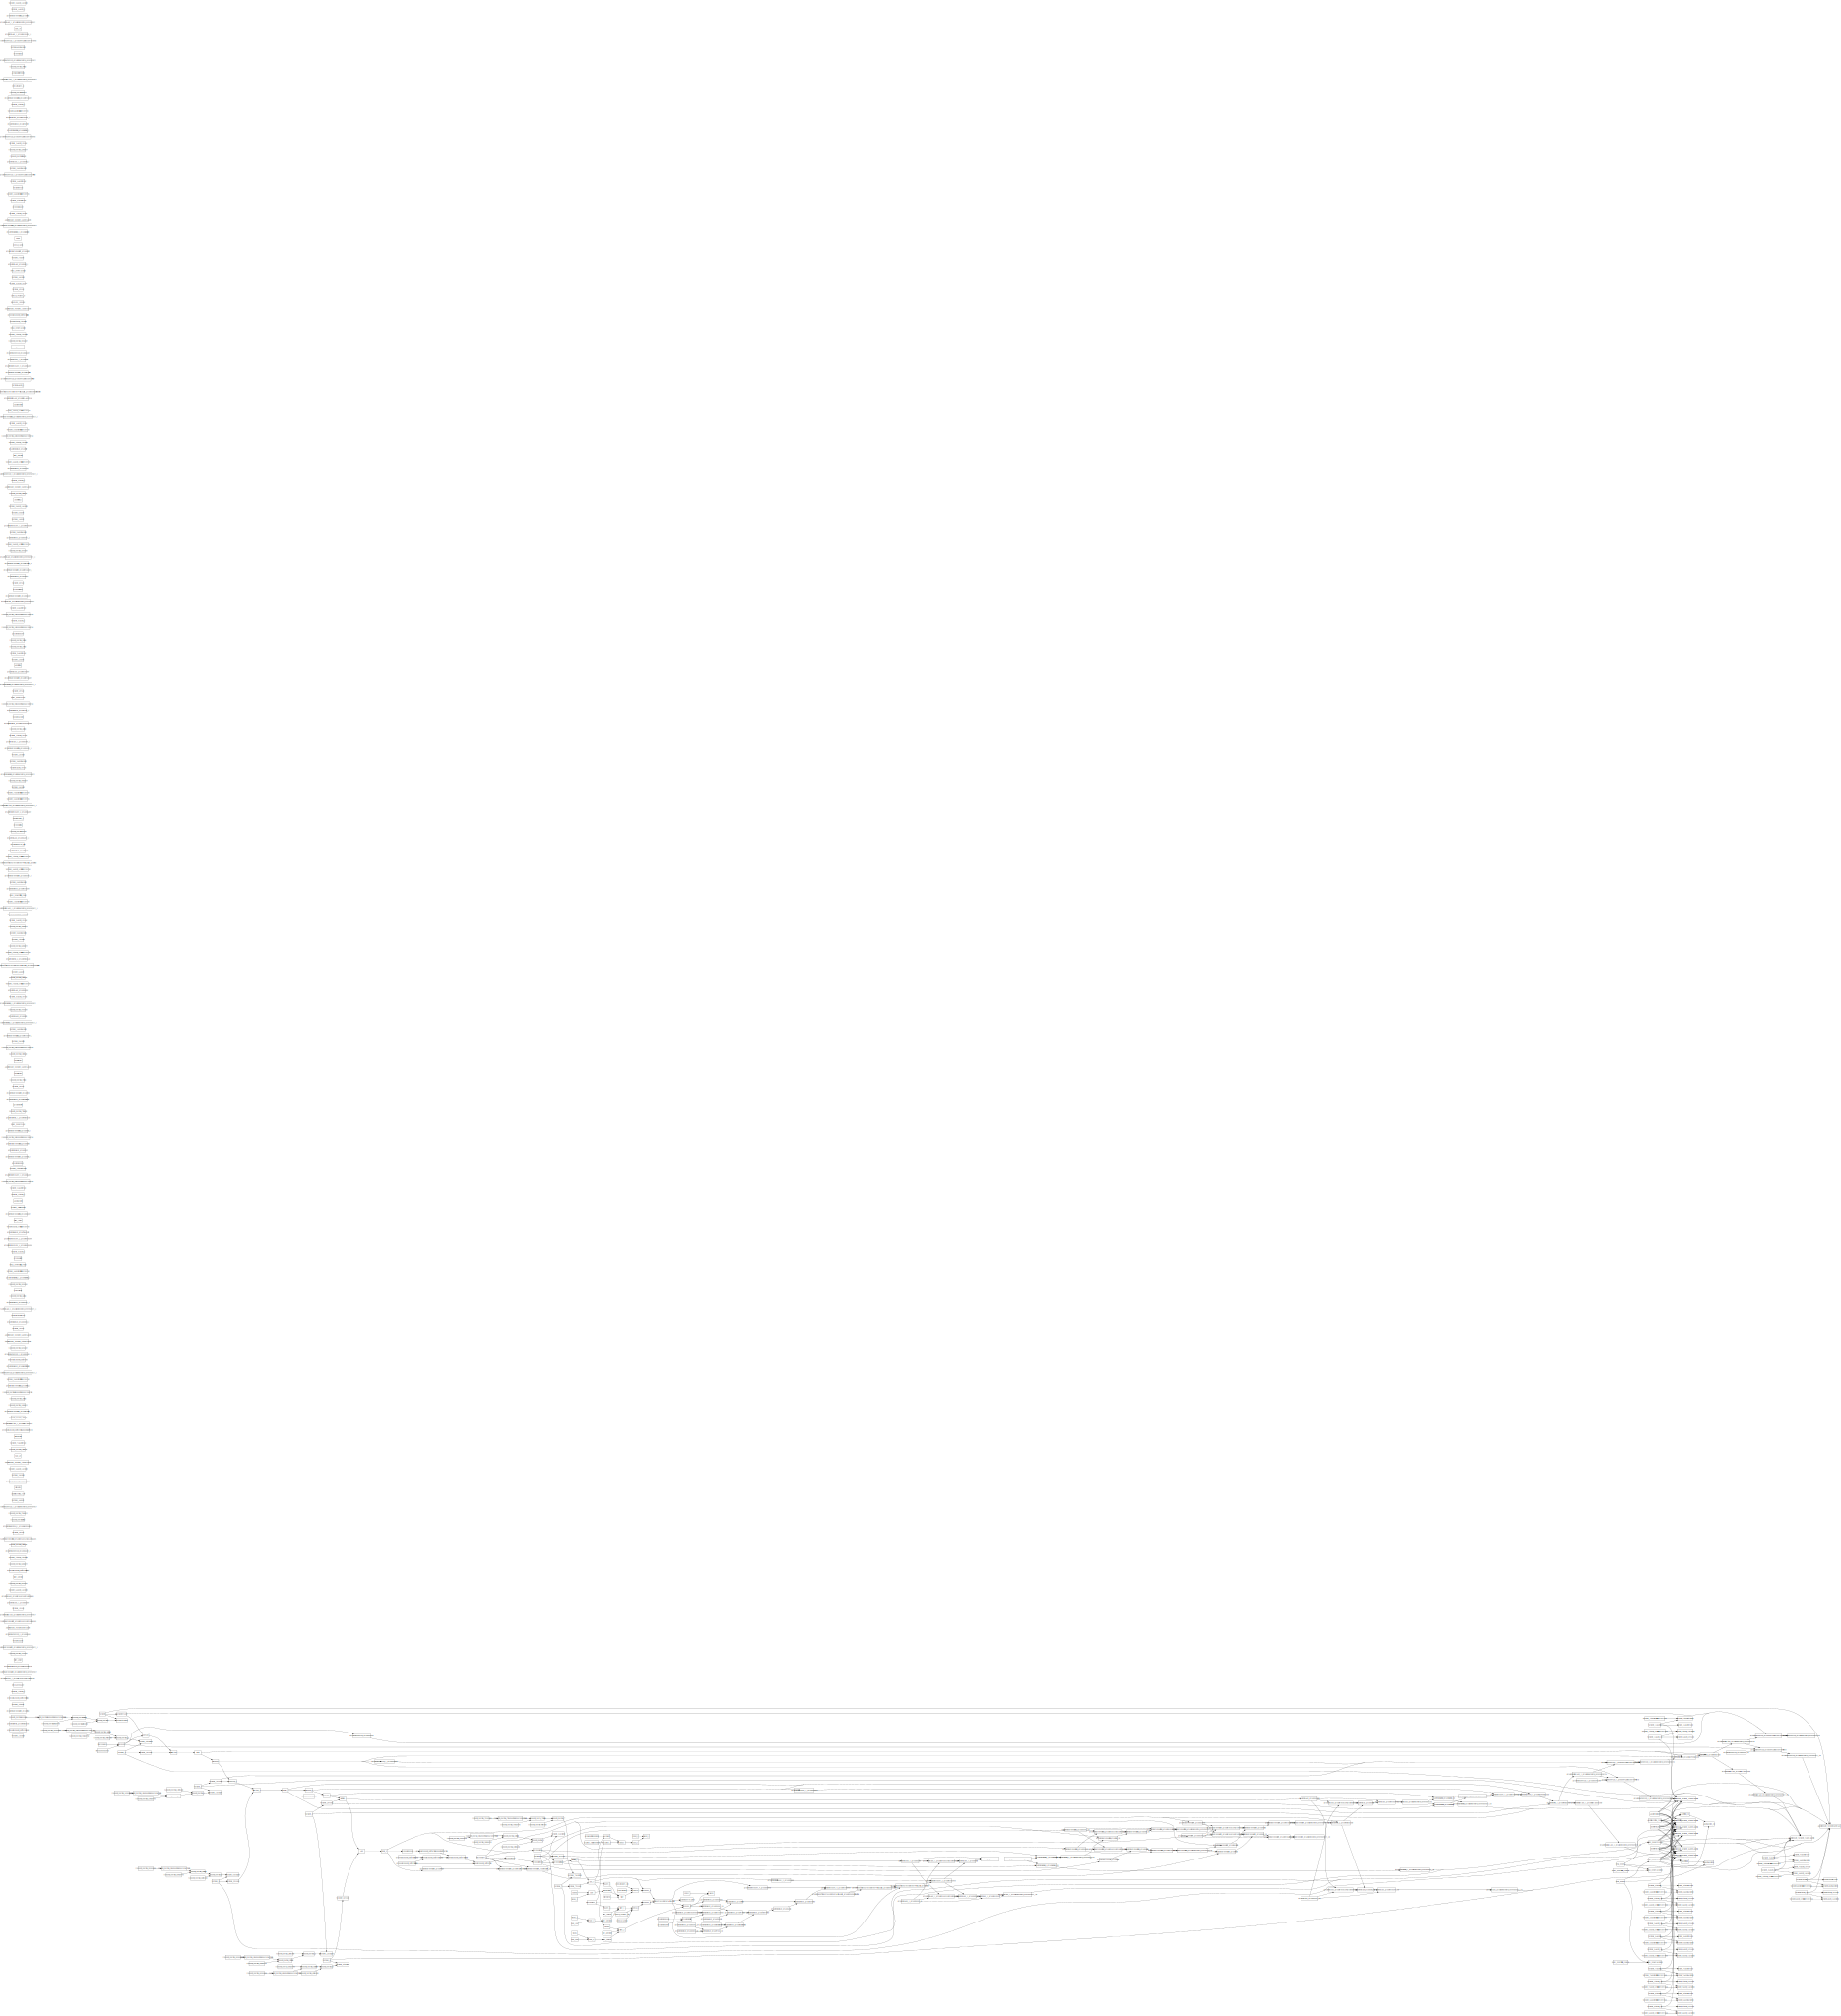

In [52]:
show_graph(tf.get_default_graph())

In [ ]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    step = 1
    # Keep training until reach max iterations
    while step * batch_size < training_iters:
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y,
                                       keep_prob: dropout})
        if step % display_step == 0:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y,
                                                              keep_prob: 1.})
            print "Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc)
        step += 1
    print "Optimization Finished!"

    # Calculate accuracy for 256 mnist test images
    print "Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: mnist.test.images[:256],
                                      y: mnist.test.labels[:256],
                                      keep_prob: 1.})

#### Exercise:

Test the model with other optimization algorithms:
- tf.train.MomentumOptimizer
- tf.train.AdagradOptimizer
- tf.train.AdamOptimizer

(Reference: http://sebastianruder.com/optimizing-gradient-descent/)

## Convolutional Network with Keras

In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Using TensorFlow backend.


In [55]:
X_train, Y_train = mnist.train.images, mnist.train.labels
X_test, Y_test = mnist.test.images, mnist.test.labels

In [56]:
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

### Baseline model

In [57]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(n_input, input_dim=n_input, kernel_initializer='normal', activation='relu'))
    model.add(Dense(n_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Reference for Keras optimization algorithms:   
https://keras.io/optimizers/

In [ ]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model

scores = model.evaluate(X_test, Y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

### Larger model

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import backend as K
K.set_image_dim_ordering('th')

In [59]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(30, (5, 5), padding='valid', input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# build the model
model = larger_model()
# Fit the model
model.fit(X_train.reshape(-1, 1, 28, 28), Y_train,
          validation_data=(X_test.reshape(-1, 1, 28, 28), Y_test),
          nb_epoch=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test.reshape(-1, 1, 28, 28), Y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

# Inception V3 model

Implementation of Google Inception V3 model for Keras.

<img src="https://4.bp.blogspot.com/-TMOLlkJBxms/Vt3HQXpE2cI/AAAAAAAAA8E/7X7XRFOY6Xo/s1600/image03.png">

**References**
- [Rethinking the Inception Architecture for Computer Vision](http://arxiv.org/abs/1512.00567)
- [Google Research Blog](https://research.googleblog.com/2016/03/train-your-own-image-classifier-with.html)

Credits: François Chollet (https://github.com/fchollet/deep-learning-models)

In [60]:
from keras.applications import inception_v3
from keras.preprocessing import image

In [61]:
img_path = 'kitten.png'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

x = inception_v3.preprocess_input(x)

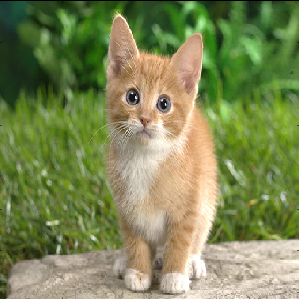

In [62]:
img

In [63]:
model = inception_v3.InceptionV3(include_top=True, weights='imagenet')

/Users/panisson/anaconda2/lib/python2.7/site-packages/keras/applications/inception_v3.py:366: UserWarning: You are using the TensorFlow backend, yet you are using the Theano image data format convention (`image_data_format="channels_first"`). For best performance, set `image_data_format="channels_last"` in your Keras config at ~/.keras/keras.json.
  warnings.warn('You are using the TensorFlow backend, yet you '


In [64]:
preds = model.predict(x)
print('Predicted:', inception_v3.decode_predictions(preds))

('Predicted:', [[(u'n02123159', u'tiger_cat', 0.46220145), (u'n02124075', u'Egyptian_cat', 0.13216901), (u'n02113023', u'Pembroke', 0.064089984), (u'n02123045', u'tabby', 0.050259609), (u'n02119789', u'kit_fox', 0.013311978)]])
